In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os 

In [2]:
torch.cuda.is_available()

True

## 1 Hidden Layer (128 Neurons)

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
image=Image.open('horse025b.png')
image=image.convert('L')
image=image.resize((128,84))
X=np.array(image)
height, width= X.shape
X=torch.Tensor(X)
X=X.flatten()
X=X.reshape(10752,1)
x_coords, y_coords=np.meshgrid(np.arange(width), np.arange(height))
input_data=np.stack((x_coords, y_coords), axis=-1)
x_coords = torch.Tensor(x_coords).float()
y_coords = torch.Tensor(y_coords).float()
coords = torch.stack((x_coords, y_coords), dim=-1)
inputs=coords.view(-1,2).float()
print(inputs.shape, X.shape)
X=(X-X.mean())/X.std()
inputs=(inputs-inputs.mean())/inputs.std()

torch.Size([10752, 2]) torch.Size([10752, 1])


In [4]:
class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(2, 128)
        self.fc2=nn.Linear(128, 1)

    def forward(self, x):
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x

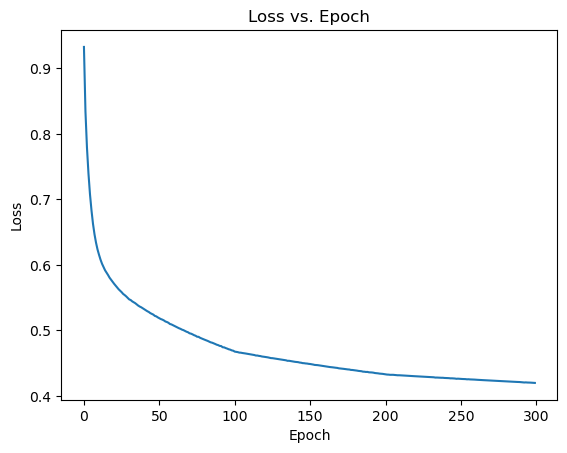

In [5]:
model=NNModel()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.003)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
epochs=300
batches=64
losses=[]
dataset=TensorDataset(inputs, X)
data_loader=DataLoader(dataset=dataset,batch_size=batches,shuffle=True)

for i in range(epochs):
    total_loss = 0.0
    for batch_coords, batch_values in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_coords)
        loss = criterion(outputs, batch_values)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    losses.append(total_loss / len(data_loader))

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

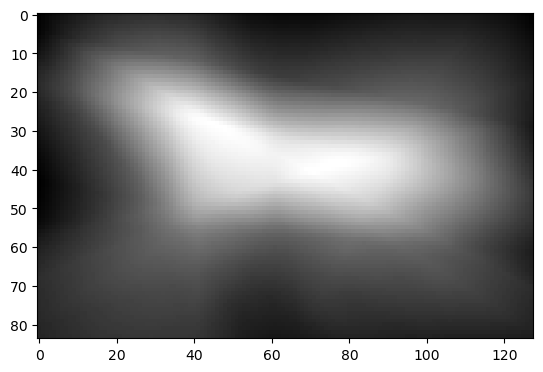

In [6]:
recon_image=model(inputs).view(84, 128)
plt.imshow(recon_image.detach().numpy(), cmap='gray')
plt.show()

## 2 Hidden Layers (32 neurons, 128 neurons)

In [7]:
class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(2, 32)
        self.fc2=nn.Linear(32,128)
        self.fc3=nn.Linear(128, 1)

    def forward(self, x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x 

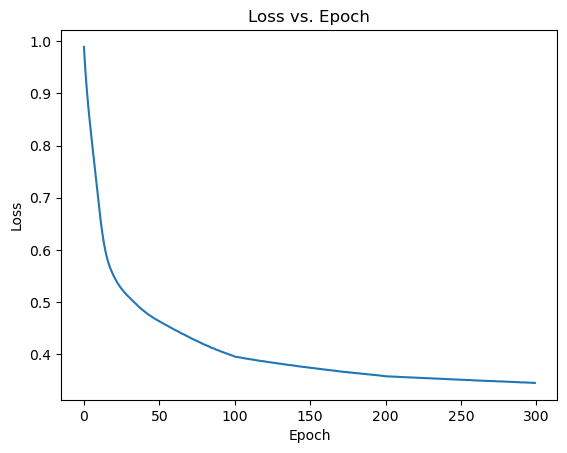

In [8]:
model=NNModel()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.003)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
epochs=300
batches=64
losses=[]
dataset=TensorDataset(inputs, X)
data_loader=DataLoader(dataset=dataset,batch_size=batches,shuffle=True)

for i in range(epochs):
    total_loss = 0.0
    for batch_coords, batch_values in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_coords)
        loss = criterion(outputs, batch_values)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    losses.append(total_loss / len(data_loader))

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

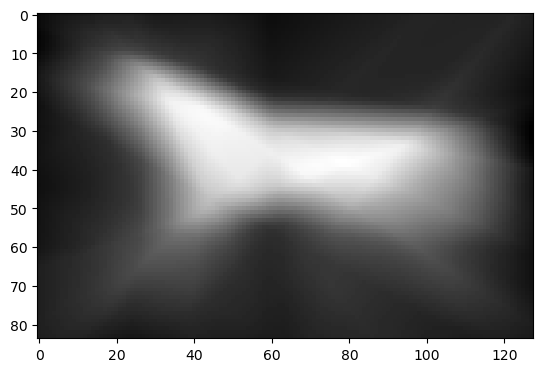

In [9]:
recon_image=model(inputs).view(84, 128)
plt.imshow(recon_image.detach().numpy(), cmap='gray')
plt.show()

## 3 Hidden Layers (32, 64, and 128 neurons)

In [10]:
class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(2, 32)
        self.fc2=nn.Linear(32, 64)
        self.fc3=nn.Linear(64, 128)
        self.fc4=nn.Linear(128, 1)

    def forward(self, x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=torch.relu(self.fc3(x))
        x=self.fc4(x)
        return x 

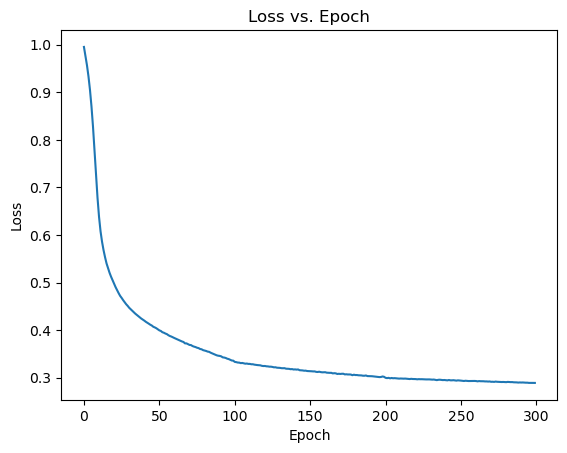

In [11]:
model=NNModel()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.003)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
epochs=300
batches=64
losses=[]
dataset=TensorDataset(inputs, X)
data_loader=DataLoader(dataset=dataset,batch_size=batches,shuffle=True)

for i in range(epochs):
    total_loss = 0.0
    for batch_coords, batch_values in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_coords)
        loss = criterion(outputs, batch_values)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    losses.append(total_loss / len(data_loader))

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

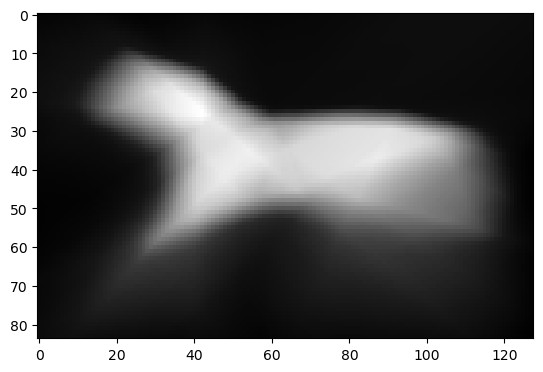

In [12]:
recon_image=model(inputs).view(84, 128)
plt.imshow(recon_image.detach().numpy(), cmap='gray')
plt.show()

## 4 Hidden Layers (32, 64, 128, and 128 neurons)

In [13]:
class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(2, 32)
        self.fc2=nn.Linear(32, 64)
        self.fc3=nn.Linear(64, 128)
        self.fc4=nn.Linear(128, 128)
        self.fc5=nn.Linear(128, 1)

    def forward(self, x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=torch.relu(self.fc3(x))
        x=torch.relu(self.fc4(x))
        x=self.fc5(x)
        return x 

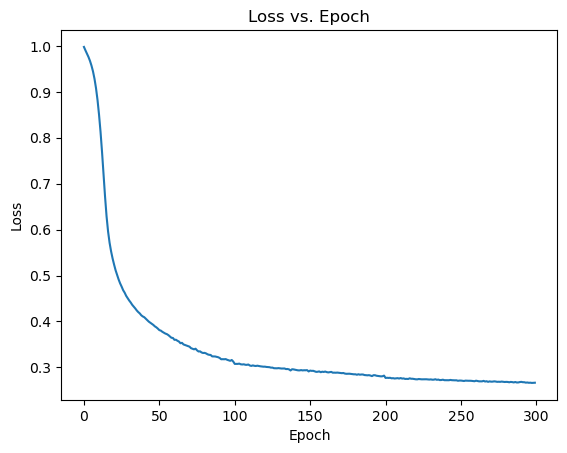

In [15]:
model=NNModel()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.003)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
epochs=300
batches=64
losses=[]
dataset=TensorDataset(inputs, X)
data_loader=DataLoader(dataset=dataset,batch_size=batches,shuffle=True)

for i in range(epochs):
    total_loss = 0.0
    for batch_coords, batch_values in data_loader:
        optimizer.zero_grad()
        outputs = model(batch_coords)
        loss = criterion(outputs, batch_values)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    scheduler.step()
    losses.append(total_loss / len(data_loader))

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.show()

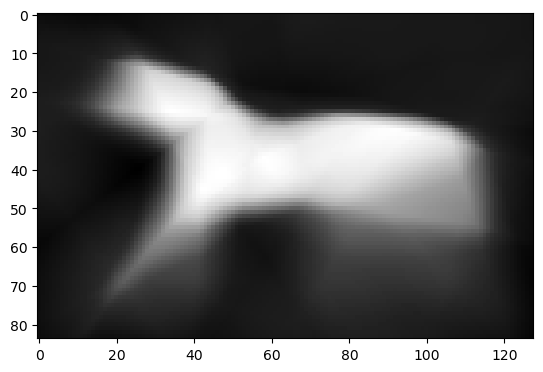

In [16]:
recon_image=model(inputs).view(84, 128)
plt.imshow(recon_image.detach().numpy(), cmap='gray')
plt.show()